Accuracy: 57.54%


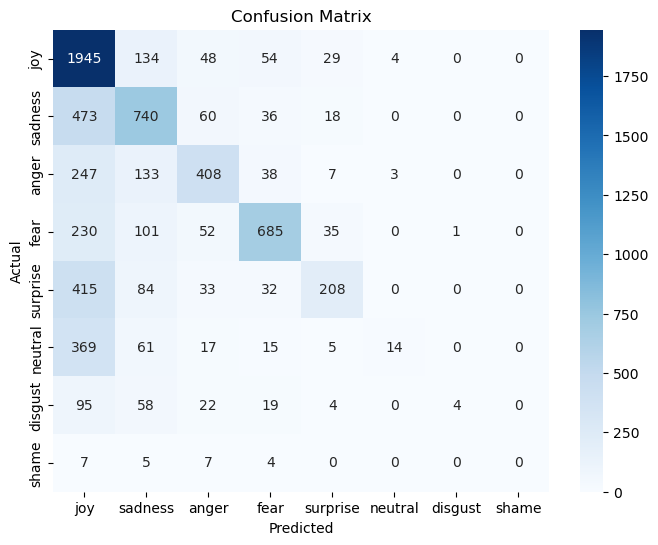

Model saved successfully!
Loaded Model Prediction: joy


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import neattext.functions as nfx
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("emotion_dataset_raw.csv")

# Selecting relevant columns
df = df[["Text", "Emotion"]]

# Clean text using neattext
df["Text"] = df["Text"].apply(lambda x: nfx.remove_stopwords(nfx.remove_punctuations(str(x).lower())))

# Mapping emotions to numerical values
label_mapping = {"joy": 0, "sadness": 1, "anger": 2, "fear": 3, "surprise": 4, "neutral": 5, "disgust": 6, "shame": 7}
df = df[df["Emotion"].isin(label_mapping.keys())]
df["Emotion"] = df["Emotion"].map(label_mapping)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df["Text"], df["Emotion"], test_size=0.2, random_state=42)

# Create a pipeline with CountVectorizer and Naive Bayes model
model_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
predictions = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Display accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save model
joblib.dump(model_pipeline, 'text_emotion.pkl')
print("Model saved successfully!")

# Load and test the model
loaded_model = joblib.load('text_emotion.pkl')
test_sentence = "I am very happy today!"
predicted_emotion = loaded_model.predict([test_sentence])[0]

# Map prediction back to emotion label
inverse_label_mapping = {v: k for k, v in label_mapping.items()}
print(f"Loaded Model Prediction: {inverse_label_mapping[predicted_emotion]}")


In [ ]:
import joblib

# Load the trained model
classifier = joblib.load("text_emotion.pkl")

# Define a mapping of numbers to emotions (adjust based on your dataset)
emotion_labels = {
    0: "joy",
    1: "sadness",
    2: "anger",
    3: "fear",
    4: "surprise",
    5: "neutral",
    6: "disgust",
    7: "shame"
}

# Interactive loop for input-output
while True:
    user_input = input("Enter a sentence (or type 'exit' to quit): ")
    
    if user_input.lower() == 'exit':
        print("Exiting program...")
        break
    
    # Predict the emotion
    predicted_label = classifier.predict([user_input])[0]
    
    # Convert numeric prediction to emotion label
    predicted_emotion = emotion_labels.get(predicted_label, "Unknown Emotion")
    
    # Print the output
    print(f"Predicted Emotion: {predicted_emotion}\n")
